# Accessing and creating content

Your GIS can host a [variety of maps, web layers, analytical tools, apps](http://doc.arcgis.com/en/arcgis-online/reference/geo-info.htm) and [individual files](http://doc.arcgis.com/en/arcgis-online/share-maps/supported-items.htm). Using the `gis` module, you can search for, access and manage all your folders, contents and automate such maintenance workflows as scripts.

In this page, we are going to observe how the following can be accomplished:
 * [Searching for content](#searching-for-content)
  * [Wild card search](#wild-card-search)
  * [Searching for content outside your organization](#searching-for-content-outside-your-org)
 * [Creating new content](#creating-new-content)
  * [Publishing an item as a web layer](#publishing-an-item-as-a-web-layer)
  * [Importing data from a pandas dataframe](#importing-data-from-a-pandas-data-frame)
  * [Publishing an empty service](#publishing-an-empty-service)
 * [Organizing content](#organizing-content)
  * [Using folders to organize your contents](#using-folders-to-organize-your-content)

<a id="searching-for-content"></a>
## Searching for content

Accessing the `content` property of your `gis` object returns you an instance of `ContentManager` class. You can use the `search()` method of the `ContentManager` object to search for items on your GIS. You can use the `search()` even if you are connected as an anonymous user, in which case you get to search for public content on ArcGIS Online.

The first step is to import the API and connect to your GIS

In [ ]:
from arcgis.gis import GIS
gis = GIS("portal url", "username", "password")

Lets see what you get when you access `content` property

In [ ]:
type(gis.content)

arcgis.gis.ContentManager

As explained earlier, we don't recommend creating your instance of `ContentManager` by yourself, instead, access it through the `content` property of your `GIS` object as shown below:

In [ ]:
search_result = gis.content.search(query="title:Ports along west coast", item_type="Feature Layer")
search_result

[<Item title:"Ports along west coast" type:Feature Service owner:arcgis_python_api>]

The `search()` method returned us a list of `Item` objects that matched the search criteria. The `query` parameter supports a variety of inputs, refer the [**search reference**](http://resources.arcgis.com/en/help/arcgis-rest-api/#/Search_reference/02r3000000mn000000/) for more ideas on what is supported. Some typical examples are shown below:

In [ ]:
# search and list all feature layers in my contents
search_result = gis.content.search(query="", item_type="Feature Layer")
search_result

[<Item title:"Brazil Subdistritos Boundaries 2014" type:Feature Service owner:esri_livingatlas>,
 <Item title:"Netherlands Postcodes4 Boundaries 2013" type:Feature Service owner:esri_livingatlas>,
 <Item title:"Mexico Municipio Boundaries 2014" type:Feature Service owner:esri_livingatlas>,
 <Item title:"World  Countries (Generalized)" type:Feature Service owner:esri_livingatlas>,
 <Item title:"United Kingdom CensusArea Boundaries 2013" type:Feature Service owner:esri_livingatlas>,
 <Item title:"Europe NUTS 2 Demographics" type:Feature Service owner:esri_livingatlas>,
 <Item title:"New Zealand Region Boundaries 2014" type:Feature Service owner:esri_livingatlas>,
 <Item title:"Isreal LocalCouncil Boundaries 2014" type:Feature Service owner:esri_livingatlas>,
 <Item title:"USA Anchorage Areas" type:Feature Service owner:esri_livingatlas>,
 <Item title:"USA Bathymetric Contours up to 600m" type:Feature Service owner:esri_livingatlas>]

Notice how the search result includes items from other users that they shared across the organization. You can limit the search to only your content by specifying that in the query string as shown below:

In [ ]:
search_my_contents = gis.content.search(query="owner:arcgis_python_api", item_type="csv")
search_my_contents

[<Item title:"world earthquakes" type:CSV owner:arcgis_python_api>,
 <Item title:"Ports along west coast" type:CSV owner:arcgis_python_api>]

<a id="wild-card-search"></a>
### Wild card search
Search supports usage of wild cards. You can use one asterisk `*` for multiple character wild card search and one question mark `?` for single character.

In [ ]:
# search for content that begin with a prefix - say 'USA'
search_result_USA = gis.content.search(query="title:USA*")
search_result_USA

[<Item title:"2016 USA Online Banking" type:Map Service owner:esri_livingatlas>,
 <Item title:"USA Insect and Disease Risk" type:Image Service owner:esri_livingatlas>,
 <Item title:"2016 USA Republican Party Affiliation" type:Map Service owner:esri_livingatlas>,
 <Item title:"USA Storm Reports" type:Map Service owner:esri_livingatlas>,
 <Item title:"USA Hazardous Waste Sites" type:Map Service owner:esri_livingatlas>,
 <Item title:"USA Soils Total Subsidence" type:Image Service owner:esri_livingatlas>,
 <Item title:"USA USFS Lands" type:Image Service owner:esri_livingatlas>,
 <Item title:"USA Coal Fields" type:Image Service owner:esri_livingatlas>,
 <Item title:"USA Anchorage Areas" type:Feature Service owner:esri_livingatlas>,
 <Item title:"USA Bathymetric Contours up to 600m" type:Feature Service owner:esri_livingatlas>]

When using the Jupyter notebook environment, you can utilize the rich representation of items for your query results.

<Item title:"2016 USA Online Banking" type:Map Service owner:esri_livingatlas>
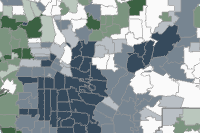

<Item title:"USA Insect and Disease Risk" type:Image Service owner:esri_livingatlas>
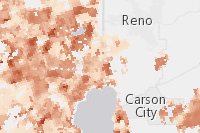

<Item title:"2016 USA Republican Party Affiliation" type:Map Service owner:esri_livingatlas>
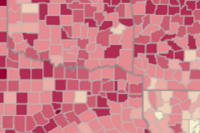

<Item title:"USA Storm Reports" type:Map Service owner:esri_livingatlas>
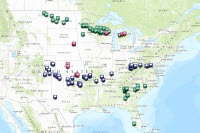

<Item title:"USA Hazardous Waste Sites" type:Map Service owner:esri_livingatlas>
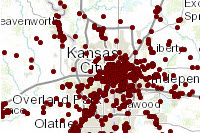

<Item title:"USA Soils Total Subsidence" type:Image Service owner:esri_livingatlas>
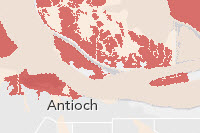

<Item title:"USA USFS Lands" type:Image Service owner:esri_livingatlas>
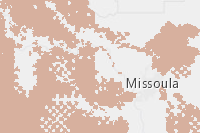

<Item title:"USA Coal Fields" type:Image Service owner:esri_livingatlas>
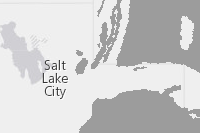

<Item title:"USA Anchorage Areas" type:Feature Service owner:esri_livingatlas>
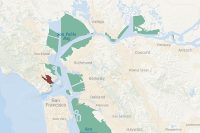

<Item title:"USA Bathymetric Contours up to 600m" type:Feature Service owner:esri_livingatlas>
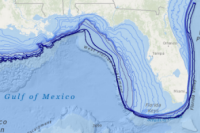

In [ ]:
from IPython.display import display
for item in search_result_USA:
    display(item)

Once you know an item's id (called `itemId`), you can access it using the `get()` method instead of searching for it.

In [ ]:
# lets get the itemid of first item from previous query
first_item = search_result_USA[0]
known_item_id = first_item.id
print(known_item_id)

69181ff131fa40b6b60d6ad0b530a8d3


<Item title:"2016 USA Online Banking" type:Map Service owner:esri_livingatlas>
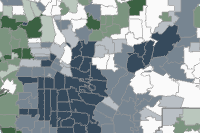

In [ ]:
# lets use the get() to access this item
online_banking_item = gis.content.get(known_item_id)
online_banking_item

<a id="searching-for-content-outside-your-org"></a>
### Searching for content outside your organization
So far, we were able to search for content that belonged to the logged in user, items published by built-in accounts and other named users but shared across the organization. When connected to ArcGIS Online, you can also search for content published by other named users and shared publicly. You can do so by turning the **`outside_org`** flag to `True`.

In [ ]:
# connect to ArcGIS Online
gis2 = GIS("https://www.arcgis.com", "username", "password")

Let us search for public web scenes visualizing 3D cities. Note, I want to see content that is most popular by number of views to be returned on the top. I am also concerned that if too many items show up, the query might be running slow, hence restrict the results to 15 items.

<Item title:"WorldPopHolistic" type:Web Scene owner:holistic_user03>
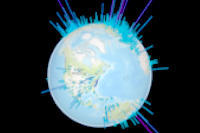

<Item title:"Crescent Beach 3d Model" type:Web Scene owner:SurreyGIS>
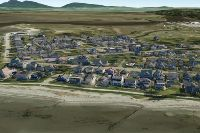

<Item title:"Vancouver Coastal Health" type:Web Scene owner:Thomas_BHCGIS>
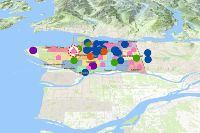

<Item title:"3dmarkers_trees_cities" type:Web Scene owner:susantran>
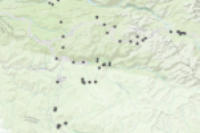

<Item title:"WorldPopML" type:Web Scene owner:holistic_user12>
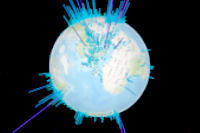

<Item title:"City of Queenstown" type:Web Scene owner:awesome3D>
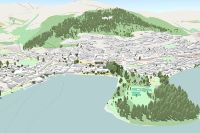

<Item title:"AtlantaCityLimits" type:Web Scene owner:mhaley7>
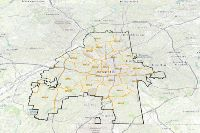

<Item title:"WorldPop" type:Web Scene owner:holistic_user14>
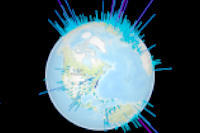

<Item title:"Miami City Test" type:Web Scene owner:GTaylor_Geodesign>
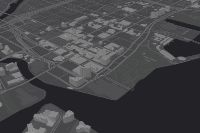

<Item title:"LandmarksCityOwned" type:Web Scene owner:MetrS1_Boulder>
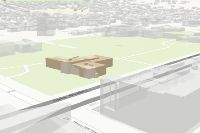

<Item title:"New York City Building heights" type:Web Scene owner:smorrish>
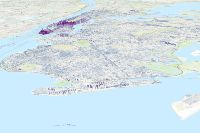

<Item title:"Kansas_City_Office_Retail" type:Web Scene owner:OriginalAdrian2>
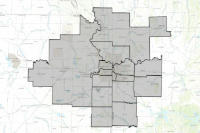

<Item title:"3d-city" type:Web Scene owner:elfordst_McMaster>

<Item title:"CBD City Model" type:Web Scene owner:admin@ndp2017>
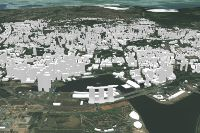

<Item title:"City of Toronto Dyas Road Drone Scene" type:Web Scene owner:amiller@esricanada.com>
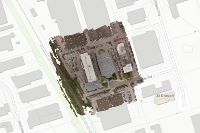

In [ ]:
public_3d_city_scenes = gis2.content.search(query="3d cities", item_type = "web scene",
                                           sort_field="numViews" ,sort_order="asc",
                                           max_items = 15, outside_org=True)
for item in public_3d_city_scenes:
    display(item)

Thus, you saw how you can apply filters and optional parameters to search for content from other users in different orgs. This collaborative aspect of GIS is quite powerful. You can quickly scale up your projects by leveraging the maps and GIS data shared by other users. You can get ideas on how to visualize or render a particular phenomenon etc. You can do all of this using the API and automate such tasks with ease. For instance, you can build a script to notify you whenever someone shares an item in your topic of interest.

So far, you observed how existing items can be searched and accessed using the `gis` module. Next, let us observe how new content can be created.

<a id="creating-new-content"></a>
## Creating new content

To create new items on your GIS, you use the `add()` method on `ContentManager` object. As earlier, you would not create this object, instead access it from the `content` property of your `GIS` object.

The `add()` method accepts a dictionary containing the properties of the item to be created. The optional `data` parameter accepts a string path to a file. You can use the optional `metadata` parameter to specify an XML file containing metadata information.

All content you add this way is added to the authenticated user's contents. Let us add a csv file and publish it as a feature layer.

In [ ]:
csv_path = r"E:\GIS_Data\file_formats\CSV\world earthquakes.csv"
csv_properties={'title':'Earthquakes around the world from 1800s to early 1900s',
                'description':'Measurements from globally distributed seismometers',
                'tags':'arcgis, python, earthquake, natural disaster, emergency'}
thumbnail_path = r"E:\GIS_Data\file_formats\CSV\remote_sensor.png"

earthquake_csv_item = gis.content.add(item_properties=csv_properties, data=csv_path,
                                     thumbnail = thumbnail_path)

The `add()` method returns an object of type `arcgis.gis.Item` representing the added item. In Jupyter notebook environment, you can visualize it by querying the item

<Item title:"Earthquakes around the world from 1800s to early 1900s" type:CSV owner:arcgis_python_api>
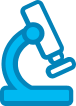

In [ ]:
earthquake_csv_item

**Note**: You can specify most properties of an item as a dictionary to the `item_properties` parameter. Refer to the [API ref doc](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.html#arcgis.gis.ContentManager.add) of this method for a definitive list. You could also specify an empty dictionary to this parameter, the downside is search cannot index these items efficiently if it does not have sufficient metadata information, hence that is not a good programming practice.

<a id="publishing-an-item-as-a-web-layer"></a>
### Publishing an item as a web layer
In the example above you added a csv item. Items such as csv, service definitions, file geodatabases, shape files and packages such as tile, scene and vector tile can be published into hosted web layers. This is accomplished by calling the `publish()` method on that `Item` object.

The `publish()` method accepts an optional `publish_parameters` dictionary where you can specify certain parameters supported by the [publish REST API](http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#/Publish_Item/02r300000080000000/). However this is optional. The `address_fields` parameter allows you to specify which field in your csv or dataset contains address fields suitable for geocoding.

Let us publish the csv into a web feature layer. This csv contains latitude and longitude coordinates of each point, hence the `address_fields` parameter can be ignored. The `publish()` method returns an `Item` object corresponding to the web layer created.

In [ ]:
earthquake_feature_layer_item = earthquake_csv_item.publish()

<Item title:"Earthquakes around the world from 1800s to early 1900s" type:Feature Service owner:arcgis_python_api>
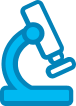

In [ ]:
earthquake_feature_layer_item

Notice that the GIS used the same metadata (thumbnail, title, description) of the source item used for publishing. This helps provide context on what the new item is and also as a good starting point for the metadata which you can edit later.

<a id="importing-data-from-a-pandas-data-frame"></a>
### Importing data from a pandas data frame

[Pandas](http://pandas.pydata.org) is a popular data analysis library for Python. The data frame object of pandas allows you to store and analyze tabular information with ease. Using the Python API, you can import such data frames as an `arcgis.features.FeatureCollection` object using the `import_data()` method. You can then add that feature collection as an item to your GIS.

Let us create a new pandas data frame representing locations of a few coastal cities read from a csv file. Note, in the example below, you could publish the csv as an item as shown earlier, but we will observe how you can filter that data through pandas and add it as a feature collection instead.

In [ ]:
# read csv as a pandas dataframe
import pandas
ports_df = pandas.read_csv(r'E:\GIS_Data\file_formats\CSV\ports.csv')
ports_df

,port_name,country,longitude,latitude,harborsize,label_position,short_form
0,SAN FRANCISCO,US,-122.416667,37.816667,L,SW,SFFO
1,ALAMEDA,US,-122.266667,37.783333,S,SW,NGZ
2,OAKLAND,US,-122.333333,37.816667,L,SW,OAK
3,POINT RICHMOND,US,-122.366667,37.916667,S,SW,RIC
4,MARE ISLAND,US,-122.266667,38.100000,S,SW,NaN
5,SOUTH VALLEJO,US,-122.250000,38.083333,S,SW,NaN
6,STOCKTON,US,-121.300000,37.950000,S,SW,SCK
7,SACRAMENTO,US,-121.500000,38.583333,S,SW,SMF
8,EUREKA,US,-124.183333,40.800000,S,SW,ACV
9,EMPIRE,US,-124.283333,43.400000,M,SW,NaN


In [ ]:
# find latitude of SFO
lat = ports_df.loc[ports_df.port_name == 'SAN FRANCISCO']['latitude']
lat

0    37.816667
Name: latitude, dtype: float64

In [ ]:
# only select ports that are to the south of SFO
ports_south_of_SFO = ports_df.loc[ports_df.latitude < lat[0]]
ports_south_of_SFO

,port_name,country,longitude,latitude,harborsize,label_position,short_form
1,ALAMEDA,US,-122.266667,37.783333,S,SW,NGZ
11,SAN DIEGO,US,-117.183333,32.716667,M,SW,SAN
12,LONG BEACH,US,-118.183333,33.766667,M,SW,LGH
13,MONTEREY,US,-121.883333,36.616667,S,SW,MRY
15,NAWILIWILI BAY,US,-159.350000,21.950000,S,SW,NaN
16,PORT ALLEN,US,-159.583333,21.900000,S,SW,NaN
17,HONOLULU,US,-157.866667,21.300000,M,SW,HNL
18,KAWAIHAE,US,-155.833333,20.033333,S,SW,NaN
19,HILO,US,-155.066667,19.733333,M,SW,ITO
21,REDLANDS,US,-117.182000,34.055600,S,SW,NaN


Now that we have the desired data frame, let us import that as a feature collection

In [ ]:
ports_fc = gis.content.import_data(ports_south_of_SFO)
ports_fc

<FeatureCollection>

Next step is to convert the feature collection to a JSON and add it as a text based item to the GIS

In [ ]:
import json
ports_fc_dict = dict(ports_fc.properties)
ports_json = json.dumps(ports_fc_dict)

In [ ]:
ports_item_properties = {'title': 'Ports to the south of SFO along west coast of USA',
                        'description':'Example demonstrating conversion of pandas ' + \
                         'dataframe object to a GIS item',
                        'tags': 'arcgis python api, pandas, csv',
                        'text':ports_json,
                        'type':'Feature Collection'}
ports_item = gis.content.add(ports_item_properties)
ports_item

<Item title:"Ports to the south of SFO along west coast of USA" type:Feature Collection owner:arcgis_python_api>

**Note**: here, we used the `add()` method to add the `FeatureCollection` object in memory as an item on the GIS. Notice we used the `text` property to pass the JSON representation of the feature collection and the `type` property to indicate the item type. You can use the same method to publish web maps and web scenes.

The [sample notebooks for content publishers](/python/sample-notebooks/publishing-web-maps-and-web-scenes/) show how the concepts discussed here can be used to publish web maps and scenes to your GIS

<a id="publishing-an-empty-service"></a>
### Publishing an empty service

So far, we observed how an existing item can be used to publish a service. The `ContentManager` class allows you to publish a new service without any content using the `create_service()` method. This capability is useful when you want to create an empty service first then add content to it by editing it from client applications - Collector for ArcGIS for instance.

Before you create a service, you would want to ensure your desired service name is available. Since service name is part of the URL for a service, they need to be unique for a service type in an org. For this purpose, you would use `is_service_name_available()` method.

Below, let us publish an empty feature service. If successful, the API would return a feature layer item.

In [ ]:
# check if service name is available
gis.content.is_service_name_available(service_name= "awesome_python", service_type = 'featureService')

True

In [ ]:
# let us publish an empty service
empty_service_item = gis.content.create_service(name='awesome_python', service_type='featureService')
empty_service_item

<Item title:"awesome_python" type:Feature Service owner:arcgis_python_api>

In [ ]:
# access the layers property of the item
empty_service_item.layers

[]

Notice that, there are no layers in this service. The first step when you edit such a service would be to [update its service definition](/python/guide/updating-feature-layer-properties/#Update-definition) and enable the editing related capabilities.

<a id="organizing-content"></a>
## Organizing content
Over time, your GIS can get filled with content. You can create folders on your GIS, just like in your file system, and use it to organize.

<a id="using-folders-to-organize-your-content"></a>
### Using folders to organize your content
The `create_folder()` and `delete_folder()` methods available on the `ContentManager` class can be used to manage your folders. Once created, you can use the `move()` method to move content into and out of folders.

Let us create a folder called 'ports' and move the `ports_item` into it 

In [ ]:
# create new folder
gis.content.create_folder(folder= 'ports')

{'id': '604631a0529e4bcf90208a3f763d45d4',
 'title': 'ports',
 'username': 'arcgis_python_api'}

In [ ]:
# move the ports_item into this folder
ports_item.move(folder= 'ports')

{'folder': '604631a0529e4bcf90208a3f763d45d4',
 'itemId': 'bc2173fd34dc43edbf4b576241c3d77b',
 'owner': 'arcgis_python_api',
 'success': True}

You can move content out of folders to root by calling the `move()` method and specifying `/` as folder name

In [ ]:
# move back to root
ports_item.move(folder='/')

{'folder': None,
 'itemId': 'bc2173fd34dc43edbf4b576241c3d77b',
 'owner': 'arcgis_python_api',
 'success': True}

## Summary
Thus, in this guide you observed how the `gis` module can be used to create new content and search for existing ones. Head over to the guide on [managing-your-content](/python/guide/managing-your-content) next. When combined into a script, the ArcGIS API for Python becomes a powerful tool to automate your GIS content creation and management tasks.